In [1]:
import importlib
# import angle_model_geom_convnextv2
import train_angle_convnextv2
# import angle_lib.angle_engine

# # Reload modules to ensure latest code is used
# # importlib.reload(angle_model_geom_convnextv2)
# importlib.reload(train_angle_convnextv2)
# importlib.reload(angle_lib.angle_engine)

# from angle_lib.angle_engine import run_epoch_stream
from train_angle_convnextv2 import main_angle_convnextv2_with_args

%load_ext autoreload
%autoreload 2

In [2]:
# !!!!!!!!change the run name!!!!!!!!!
%reload_ext autoreload
import torch, gc
gc.collect()
torch.cuda.empty_cache()

print("start training")

main_angle_convnextv2_with_args(
    root="~/meghome/xec-ml-wl/data/MCGammaAngle_0-10.root",
    tree="tree",
    epochs=2,
    batch=1024,
    chunksize=32000,
    lr=3e-4,
    weight_decay=1e-4,
    drop_path_rate=0.0,
    time_shift=0.0,
    time_scale=1e7,
    use_scheduler=0,
    warmup_epochs=0,
    amp=True,
    max_chunks=None,
    npho_branch="relative_npho",
    time_branch="relative_time",
    NphoScale=1e5,
    NphoScale2=13,
    onnx="meg2ang_convnextv2.onnx",
    mlflow_experiment="gamma_angle",
    run_name="runs100_lr3e-4_test",
    outer_mode="finegrid",
    outer_fine_pool=(3,3),
    reweight_mode="none",
    nbins_theta=50,
    nbins_phi=50,
    loss_type="smooth_l1",
    #resume_from="/data/user/ext-li_w1/meghome/xec-ml-wl/artifacts/runs100_lr3e-4_test/checkpoint_last.pth"
)

start training
[INFO] Using Constant LR (no scheduler).
[001] tr_loss 57.95233 val_loss 57.39266 lr 3.00e-04 time 57.0s
   [info] New best val_loss: 57.392660
[002] tr_loss 57.05856 val_loss 56.68044 lr 3.00e-04 time 41.6s
   [info] New best val_loss: 56.680437
[INFO] Saving validation ROOT file to /data/user/ext-li_w1/meghome/xec-ml-wl/artifacts/runs100_lr3e-4_test/validation_results_runs100_lr3e-4_test.root...
[INFO] Exporting ONNX model to /data/user/ext-li_w1/meghome/xec-ml-wl/artifacts/runs100_lr3e-4_test/meg2ang_convnextv2.onnx...


/data/user/ext-li_w1/meghome/xec-ml-wl/angle_lib/geom_utils.py:16: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  idx_flat = torch.from_numpy(index_map.reshape(-1)).to(device)


[INFO] ONNX model exported and logged.


In [14]:
import angle_lib.angle_engine
print(angle_lib.angle_engine.__file__)

/data/user/ext-li_w1/meghome/xec-ml-wl/angle_lib/angle_engine.py


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[INFO] Opening /data/user/ext-li_w1/meghome/xec-ml-wl/data/MCGammaAngle_0-49.root...
[INFO] Loading Event 0...
[INFO] Generating Plot...

[SUCCESS] PDF saved to: /data/user/ext-li_w1/meghome/xec-ml-wl/test_real_event_0_time.pdf
File size: 56508 bytes
Displaying inline version now...


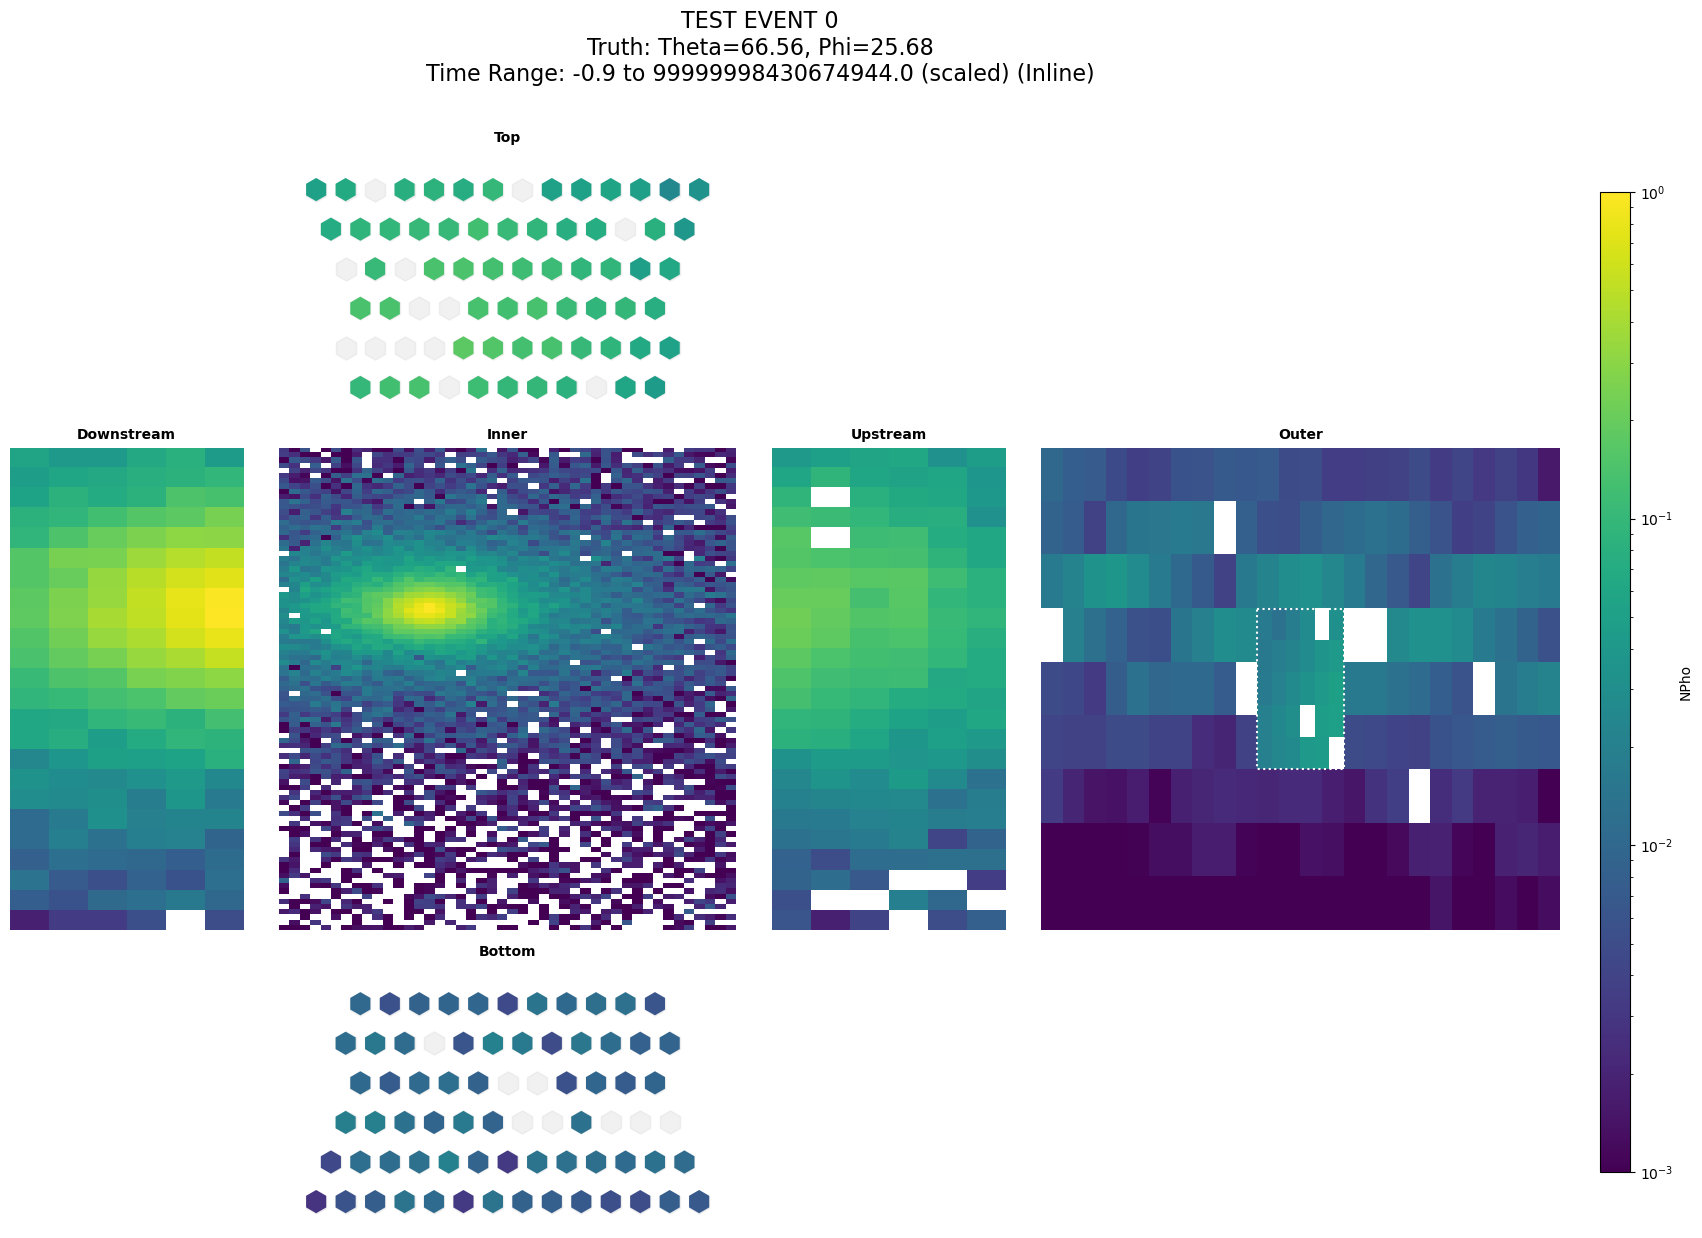

In [15]:
import uproot
import numpy as np
import os
import matplotlib.pyplot as plt

# 1. Force reload of your library to ensure latest changes are used
%load_ext autoreload
%autoreload 2
from angle_lib.event_display import plot_event_time, plot_event_faces

# 2. Settings
# Use the path you provided earlier
root_file_path = os.path.expanduser("~/meghome/xec-ml-wl/data/MCGammaAngle_0-49.root")
tree_name = "tree"
event_id = 0  # Let's look at the first event
save_filename = f"test_real_event_{event_id}_time.pdf"

# 3. Load Real Data
if not os.path.exists(root_file_path):
    print(f"[ERROR] File not found: {root_file_path}")
else:
    print(f"[INFO] Opening {root_file_path}...")
    with uproot.open(root_file_path) as f:
        tree = f[tree_name]
        
        # Load just one event
        print(f"[INFO] Loading Event {event_id}...")
        arrays = tree.arrays(
            ["relative_npho", "relative_time", "emiAng"], 
            library="np", 
            entry_start=event_id, 
            entry_stop=event_id+1
        )
        
        # Extract arrays (Shape: 4760,)
        npho_raw = arrays["relative_npho"][0]
        time_raw = arrays["relative_time"][0]
        angles   = arrays["emiAng"][0]

        # 4. Preprocessing (Mimic your training script)
        # Your training script does: time_disp = raw_t / 1e-7
        time_scaled = time_raw / 1e-7
        
        # Title string similar to training script
        title_str = (f"TEST EVENT {event_id}\n"
                     f"Truth: Theta={angles[0]:.2f}, Phi={angles[1]:.2f}\n"
                     f"Time Range: {time_scaled.min():.1f} to {time_scaled.max():.1f} (scaled)")

        # 5. Run the Plotter
        # Remove old test file to be sure
        if os.path.exists(save_filename):
            os.remove(save_filename)
            
        print("[INFO] Generating Plot...")
        
        # Call your function
        plot_event_time(
            npho_data=npho_raw,
            time_data=time_scaled,
            title=title_str,
            savepath=save_filename
        )
        
        # 6. Verify
        if os.path.exists(save_filename):
            print(f"\n[SUCCESS] PDF saved to: {os.path.abspath(save_filename)}")
            print(f"File size: {os.path.getsize(save_filename)} bytes")
            
            # Optional: Display inline to check visuals
            print("Displaying inline version now...")
            # plot_event_time(npho_raw, time_scaled, title=title_str + " (Inline)")
            plot_event_faces(npho_raw, title=title_str + " (Inline)")
        else:
            print("[FAIL] The PDF file was not created.")